In [5]:
import pandas as pd
from IPython.display import display


In [6]:
df = pd.read_csv("red-wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [8]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [9]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [10]:
  print(X_train.shape)

(1119, 11)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [12]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 112ms/step - loss: 0.2926 - val_loss: 0.1382
Epoch 2/10
5/5 [==============================] - 0s 45ms/step - loss: 0.1448 - val_loss: 0.1390
Epoch 3/10
5/5 [==============================] - 0s 48ms/step - loss: 0.1337 - val_loss: 0.1252
Epoch 4/10
5/5 [==============================] - 0s 48ms/step - loss: 0.1218 - val_loss: 0.1265
Epoch 5/10
5/5 [==============================] - 0s 48ms/step - loss: 0.1159 - val_loss: 0.1111
Epoch 6/10
5/5 [==============================] - 0s 46ms/step - loss: 0.1122 - val_loss: 0.1105
Epoch 7/10
5/5 [==============================] - 0s 46ms/step - loss: 0.1086 - val_loss: 0.1055
Epoch 8/10
5/5 [==============================] - 0s 46ms/step - loss: 0.1054 - val_loss: 0.1027
Epoch 9/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1050 - val_loss: 0.1108
Epoch 10/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1038 - val_loss: 0.1028


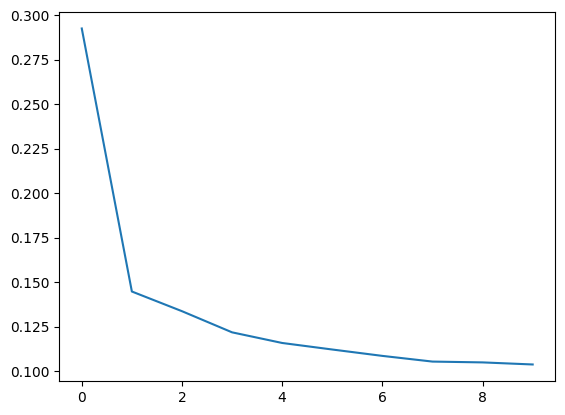

In [14]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();